 # ---> **LIBRERÍAS** <---

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

import tensorflow as tf
import keras.utils
import keras.losses
import keras.optimizers
import keras.metrics

from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.9.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# ---> **IMPORTAR DATASETS** <---

In [2]:
lotes = 64
semilla = 33

nombre_dataset = 'cats20_probarV2'

train_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TRAINING'
validation_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/VALIDATION'
test_directory = f'C:/Users/aleja/Downloads/{nombre_dataset}/TESTING'

In [3]:
def importarDatasets(dimensiones: tuple):
    
    train_dataset = keras.utils.image_dataset_from_directory(
                train_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    validation_dataset = keras.utils.image_dataset_from_directory(
                validation_directory,
                labels='inferred',
                label_mode='categorical',
                image_size=dimensiones,
                batch_size=lotes,
                seed=semilla
    )

    testing_dataset = keras.utils.image_dataset_from_directory(
            test_directory,
            labels='inferred',
            label_mode='categorical',
            image_size=dimensiones,
            batch_size=lotes,
            seed=semilla
    )
    
    class_names = train_dataset.class_names
    num_classes = len(class_names)

    return train_dataset, validation_dataset, testing_dataset, num_classes

 # ---> **MODELO4: EfficientNetB2 con GPU** <---

In [4]:
from keras.applications import EfficientNetB2
from keras.layers import Input

dimensionesModelo4 = (224, 224)
train_dataset, validation_dataset, testing_dataset, num_classes = importarDatasets(dimensionesModelo4)

dimension_foto = dimensionesModelo4[0]

model4 = Sequential()
model4.add(Input(shape=(dimension_foto, dimension_foto, 3)))

efficientNetB2 = EfficientNetB2(weights='imagenet', include_top=False)
efficientNetB2.trainable=False
model4.add(efficientNetB2)

model4.add(Flatten())
model4.add(Dense(128,activation='relu'))
model4.add(Dense(64,activation='relu'))
model4.add(Dense(64,activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

model4.build(input_shape=(32, dimension_foto, dimension_foto, 3))
model4.summary()

Found 10910 files belonging to 31 classes.
Found 3100 files belonging to 31 classes.
Found 1544 files belonging to 31 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, None, None, 1408)  7768569  
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 128)               8831104   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 31)                2015  

In [5]:
import time

model4.compile(
  optimizer=keras.optimizers.SGD(),
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

inicio = time.time()

history = model4.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=15,
                    verbose=1,
                    shuffle=True,
)

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Epoch 1/15
171/171 [==============================] - 33s 147ms/step - loss: 1.5995 - accuracy: 0.5516 - precision: 0.8109 - recall: 0.3678 - val_loss: 1.0545 - val_accuracy: 0.6671 - val_precision: 0.7662 - val_recall: 0.5497
Epoch 2/15
171/171 [==============================] - 23s 132ms/step - loss: 0.6352 - accuracy: 0.8066 - precision: 0.8806 - recall: 0.7338 - val_loss: 0.6840 - val_accuracy: 0.7968 - val_precision: 0.8461 - val_recall: 0.7397
Epoch 3/15
171/171 [==============================] - 22s 128ms/step - loss: 0.3811 - accuracy: 0.8855 - precision: 0.9211 - recall: 0.8440 - val_loss: 0.5856 - val_accuracy: 0.8252 - val_precision: 0.8668 - val_recall: 0.7916
Epoch 4/15
171/171 [==============================] - 22s 128ms/step - loss: 0.2284 - accuracy: 0.9324 - precision: 0.9517 - recall: 0.9108 - val_loss: 0.7691 - val_accuracy: 0.7565 - val_precision: 0.8025 - val_recall: 0.7287
Epoch 5/15
171/171 [==============================] - 24s 135ms/step - loss: 0.1468 - accura

 # ---> **RESULTADOS** <---

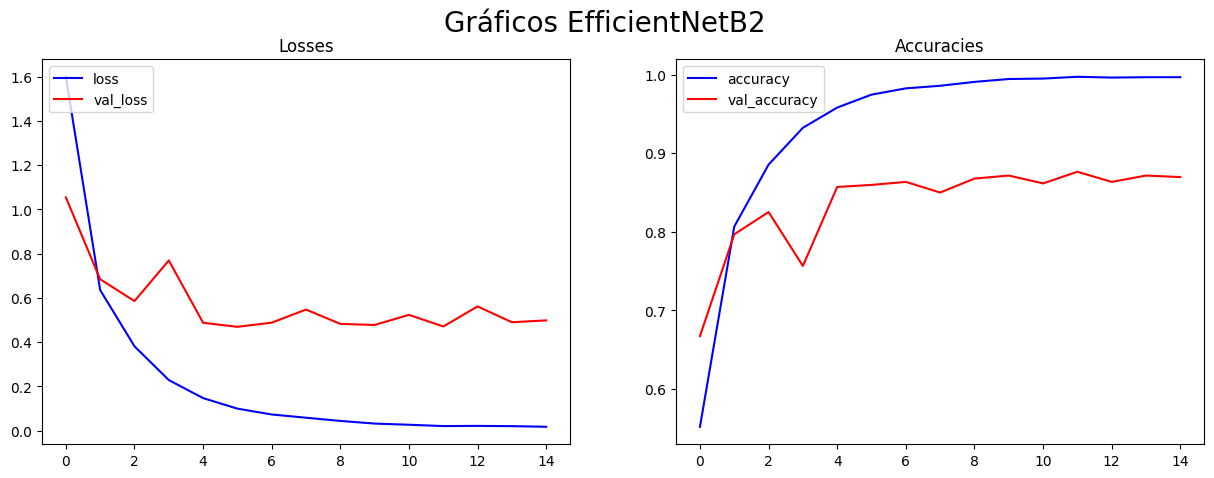

25/25 [==============================] - 4s 115ms/step - loss: 0.4375 - accuracy: 0.8802 - precision: 0.8977 - recall: 0.8698
***** Test loss: 0.43749162554740906 *****
***** Test accuracy: 0.8801813721656799 *****


In [6]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Losses')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Accuracies')
plt.plot(history.history['accuracy'], color='blue', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
plt.legend(loc="upper left")

fig.suptitle('Gráficos EfficientNetB2', fontsize=20)
plt.show()
#---------------------------------
test_loss, test_acc, precision, recall = model4.evaluate(testing_dataset, verbose=1)
print('***** Test loss:', test_loss, '*****')
print('***** Test accuracy:', test_acc, '*****')

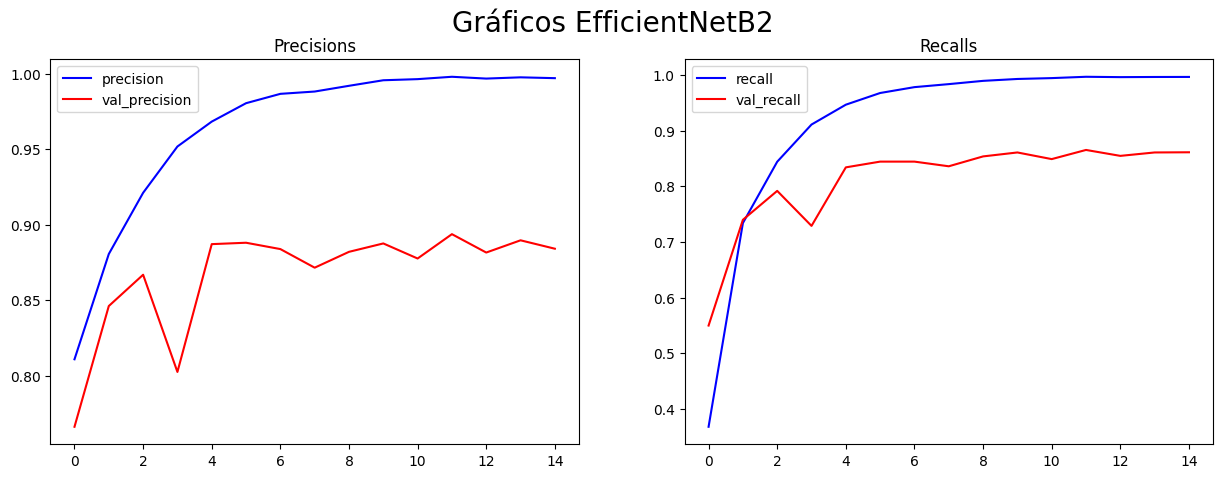

In [7]:
fig = plt.figure(figsize=(15,5))

fig.add_subplot(1,2,1)
plt.title(label='Precisions')
plt.plot(history.history['precision'], color='blue', label='precision')
plt.plot(history.history['val_precision'], color='red', label='val_precision')
plt.legend(loc="upper left")

fig.add_subplot(1,2,2)
plt.title(label='Recalls')
plt.plot(history.history['recall'], color='blue', label='recall')
plt.plot(history.history['val_recall'], color='red', label='val_recall')
plt.legend(loc="upper left")

fig.suptitle('Gráficos EfficientNetB2', fontsize=20)
plt.show()

 # ---> **PREDECIR IMÁGENES** <---

In [20]:
def predecir_imagenes(numFotosPredecir: int):
  directorio_base = test_directory
  lista_razas = os.listdir(directorio_base)

  figura = plt.figure(figsize=(12,8))
  class_names = os.listdir(train_directory)

  LISTA_NP_ARRAYS = []
  LISTA_RAZAS = []

  for i in range(numFotosPredecir): # nº de fotos a predecir
    raza_escogida = random.choice(lista_razas)
    LISTA_RAZAS.append(raza_escogida)
    directorio_raza = f'{directorio_base}/{raza_escogida}'
    nombre_imagen = random.choice(os.listdir(directorio_raza))
    print(directorio_raza, '::', nombre_imagen)

    imagen = Image.open(f'{directorio_raza}/{nombre_imagen}')
    imagen = imagen.resize(dimensionesModelo4)
    imagen = np.array(imagen)
    LISTA_NP_ARRAYS.append(imagen) # añado el numpy array
    imagen = np.expand_dims(imagen, axis=0)

    prediction_array = model4(imagen)  
    index_predicted = np.argmax(prediction_array)
    label_predicted = class_names[index_predicted]
    #------------------------------------------------------
    figura.add_subplot(2,3,i+1)
    plt.imshow(LISTA_NP_ARRAYS[i])
    plt.axis(False)
    plt.title(f"{LISTA_RAZAS[i]}\n Predicted: {label_predicted}")
  
  plt.show()

C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Scottish Fold :: Scottish Fold_548.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Snowshoe :: Snowshoe_318.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Nebelung :: Nebelung_101.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Turkish Angora :: Turkish Angora_91.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Tortoishell :: Tortoishell_641.jpg
C:/Users/aleja/Downloads/cats20_probarV2/TESTING/Russian Blue :: Russian Blue_360.jpg


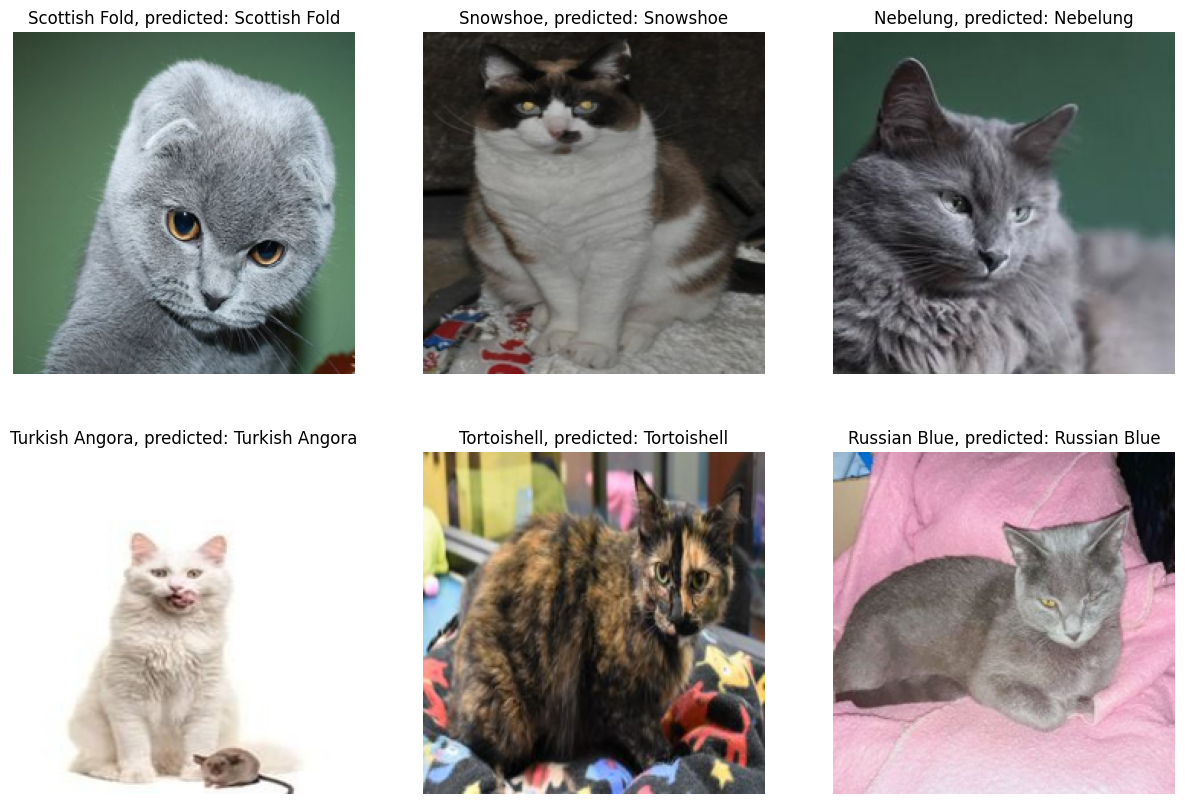

In [21]:
predecir_imagenes(6)

# ---> **MATRIZ DE CONFUSIÓN BUENA** <---

In [8]:
predicted_labels = []
true_labels = []

datasetIterator = list(testing_dataset.as_numpy_iterator()) # 25 batches de 64

for imagenes, labels in datasetIterator: # datasetIterator: lista de 25 tuplas, cada tupla con 64 imágenes y 64 labels
    true_labels += list(np.argmax(labels, axis=1)) # OK

    lote = imagenes/255
    predicciones = model4.predict(imagenes)
    predicted_labels += list(np.argmax(predicciones, axis=1))    

1/1 [==============================] - 1s 1s/step


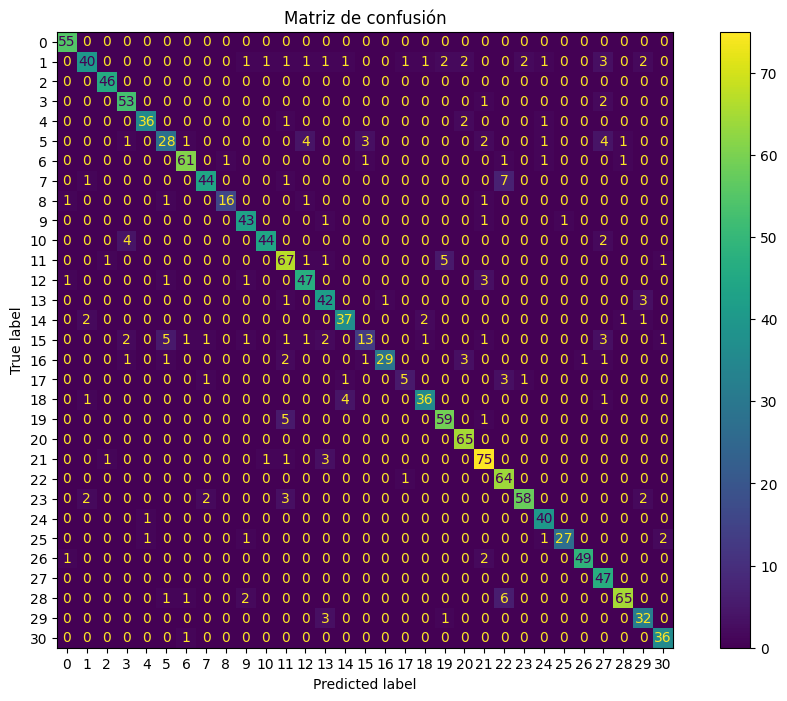

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matrix = confusion_matrix(true_labels, predicted_labels)

figura, axes = plt.subplots(figsize=(12, 8))
confusionMatrix = ConfusionMatrixDisplay(matrix)  # display_labels=lista_razas_test
confusionMatrix.plot(ax=axes, cmap='viridis')
confusionMatrix.ax_.set_title("Matriz de confusión")

plt.show()

# **MÉTRICAS**

In [10]:
from sklearn.metrics import classification_report

In [11]:
valores = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

valores['weighted avg']

{'precision': 0.8824856980269218,
 'recall': 0.8801813471502591,
 'f1-score': 0.8768627775844732,
 'support': 1544.0}

# ---> **GUARDAR Y CARGAR MODELO** <---

In [ ]:
import keras
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [24]:
model4.save("MendozasNet88v2.keras")
instancia = keras.models.load_model("MendozasNet88v2.keras")

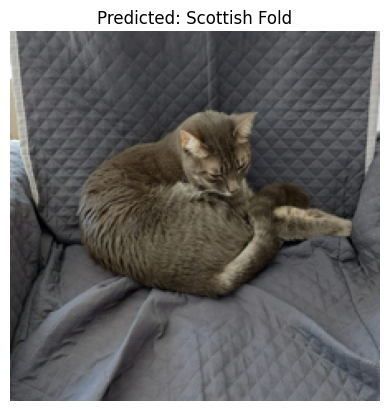

In [25]:
imagen = Image.open('AAAlucas.jpeg').resize(size=(224,224))
imagen = np.array(imagen)
auxiliar = imagen
imagen = np.expand_dims(imagen, axis=0)

class_names = os.listdir(test_directory)

prediction_array = instancia(imagen) 
index_predicted = np.argmax(prediction_array[0]) # [[...]]
label_predicted = class_names[index_predicted]

# lista = prediction_array[0].numpy().tolist()
# print(sorted(lista,reverse=True)[:3])

plt.imshow(auxiliar)
plt.axis(False)
plt.title(f'Predicted: {label_predicted}')
plt.show()